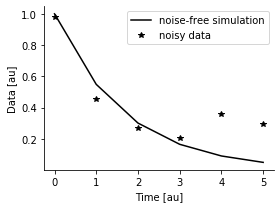

In [30]:
import pyabc
import os
import pickle
import matplotlib.pyplot as plt
from study_abc_noise.model import NonIdAblePrioredModelVars
%matplotlib inline

mv = NonIdAblePrioredModelVars()
n_t = 6
mv.n_t = n_t
model = mv.get_model()
model_noisy = mv.get_model_noisy()

if os.path.exists(f"data_{n_t}.dat"):
    data_nonoise, data = pickle.load(open(f"data_{n_t}.dat", 'rb'))
else:
    data_nonoise = model(mv.p_true)
    data = model_noisy(mv.p_true)
    pickle.dump((data_nonoise, data), open(f"data_{n_t}.dat", 'wb'))

fig, ax = plt.subplots()
ax.plot(data_nonoise['y'], '-', color='k', label="noise-free simulation")
ax.plot(data['y'], '*', color='k', label="noisy data")
ax.set_xlabel("Time [au]")
ax.set_ylabel("Data [au]")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
fig.set_size_inches((4,3))
fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f"data_{n_t}.{fmt}", format=fmt)

prior = mv.get_prior()

In [16]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model, prior, distance, population_size=1000)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=8, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 14:55:25.907205, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 16.398576850627798
INFO:ABC:t: 0, eps: 16.398576850627798.
INFO:ABC:Acceptance rate: 1000 / 2071 = 4.8286e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 11.498147637292949.
INFO:ABC:Acceptance rate: 1000 / 2317 = 4.3159e-01, ESS=9.5370e+02.
INFO:ABC:t: 2, eps: 7.636696642508952.
INFO:ABC:Acceptance rate: 1000 / 2161 = 4.6275e-01, ESS=9.6145e+02.
INFO:ABC:t: 3, eps: 4.873633959073595.
INFO:ABC:Acceptance rate: 1000 / 2162 = 4.6253e-01, ESS=9.8478e+02.
INFO:ABC:t: 4, eps: 3.7280515849113653.
INFO:ABC:Acceptance rate: 1000 / 2165 = 4.6189e-01, ESS=9.8316e+02.
INFO:ABC:t: 5, eps: 3.3329702728931756.
INFO:ABC:Acceptance rate: 1000 / 1986 = 5.0352e-01, ESS=9.8418e+02.
INFO:ABC:t: 6, eps: 3.224546575257372.
INFO:ABC:Acceptance rate: 1000 / 2032 = 4.9213e-01, ESS=9.8996e+02.
INFO:ABC:t: 7, eps: 3.198330012714106.
INFO:ABC:Acceptance rate: 100

In [17]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=1000)
abc.new("sqlite:///h_noisymodel.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 14:55:46.102874, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 34.96934151681699
INFO:ABC:t: 0, eps: 34.96934151681699.
INFO:ABC:Acceptance rate: 1000 / 2057 = 4.8614e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 14.825765778211187.
INFO:ABC:Acceptance rate: 1000 / 2255 = 4.4346e-01, ESS=9.4508e+02.
INFO:ABC:t: 2, eps: 10.252159307153294.
INFO:ABC:Acceptance rate: 1000 / 4106 = 2.4355e-01, ESS=9.2094e+02.
INFO:ABC:t: 3, eps: 7.460568099872555.
INFO:ABC:Acceptance rate: 1000 / 6933 = 1.4424e-01, ESS=7.8246e+02.
INFO:ABC:t: 4, eps: 5.585796366464448.
INFO:ABC:Acceptance rate: 1000 / 12199 = 8.1974e-02, ESS=7.1625e+02.
INFO:ABC:t: 5, eps: 4.270119614396911.
INFO:ABC:Acceptance rate: 1000 / 21260 = 4.7037e-02, ESS=7.1347e+02.
INFO:ABC:t: 6, eps: 3.254319875945189.
INFO:ABC:Acceptance rate: 1000 / 33938 = 2.9465e-02, ESS=7.0727e+02.
INFO:ABC:t: 7, eps: 2.4646340467843597.
INFO:ABC:Acceptance rate: 10

In [18]:
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

abc = pyabc.ABCSMC(model, prior, kernel,
                   eps=temperature, acceptor=acceptor,
                   population_size=1000)
abc.new("sqlite:///h_stochasticacceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-26 14:57:39.368214, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.5466e+00 for t=0.
INFO:ABC:t: 0, eps: 6.821885921612214.
DEBUG:Acceptor:Encountered pd=2.5480e+00 > c=2.5466e+00, thus weight=1.0002e+00.
DEBUG:Acceptor:Encountered pd=2.5468e+00 > c=2.5466e+00, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5478e+00 > c=2.5466e+00, thus weight=1.0002e+00.
DEBUG:Acceptor:Encountered pd=2.5475e+00 > c=2.5466e+00, thus weight=1.0001e+00.
DEBUG:Acceptor:Encountered pd=2.5476e+00 > c=2.5466e+00, thus weight=1.0002e+00.
DEBUG:Acceptor:Encountered pd=2.5476e+00 > c=2.5466e+00, thus weight=1.0001e+00.
DEBUG:Acceptor:Encountered pd=2.5478e+00 > c=2.5466e+00, thus weight=1.0002e+00.
INFO:ABC:Acceptance rate: 1000 / 3401 = 2.9403e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.5480e+00 for t=1.
INFO:ABC:t: 1, eps: 3.231920079084358.
DEBUG:Acceptor:Encountered pd=2.5481e+00 > c=2.5480e+00, thus weight=1.

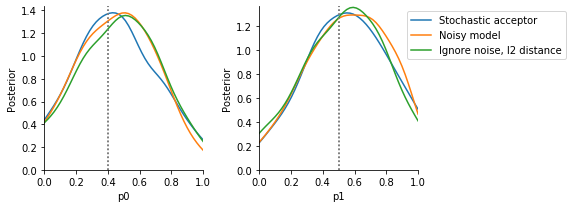

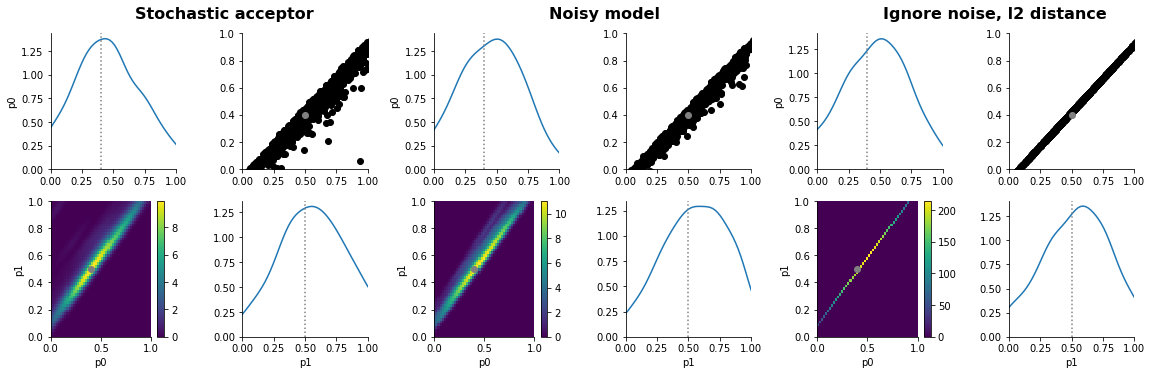

In [28]:
h_incorrect = pyabc.History("sqlite:///h_incorrect.db")
h_stochacc = pyabc.History("sqlite:///h_stochasticacceptor.db")
h_noisymodel = pyabc.History("sqlite:///h_noisymodel.db")

fig, arr_ax = plt.subplots(1,2)

for ip, p in enumerate(['p0', 'p1']):
    ax = arr_ax[ip]
    pyabc.visualization.plot_kde_1d_highlevel(
        h_stochacc, x=p, ax=ax, xmin=mv.limits[p][0], xmax=mv.limits[p][1],
        refval=mv.p_true, refval_color='grey', label="Stochastic acceptor")
    pyabc.visualization.plot_kde_1d_highlevel(
        h_noisymodel, x=p, ax=ax, xmin=mv.limits[p][0], xmax=mv.limits[p][1],
        refval=mv.p_true, refval_color='grey', label="Noisy model")
    pyabc.visualization.plot_kde_1d_highlevel(
        h_incorrect, x=p, ax=ax, xmin=mv.limits[p][0], xmax=mv.limits[p][1],
        refval=mv.p_true, refval_color='grey', label="Ignore noise, l2 distance")
    #ax.set_xlabel(f"$\\theta_{ip+1}$")
    ax.set_ylabel("Posterior")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

ax.legend(loc="upper left", bbox_to_anchor=(0.9,1))
fig.set_size_inches((8, 3))
fig.tight_layout()
    
for fmt in ['svg', 'eps']:
    plt.savefig(f"kde_1d.{fmt}", format=fmt)

fig, arr_ax = plt.subplots(2,6)

for ih, h in enumerate([h_stochacc, h_noisymodel, h_incorrect]):
    _arr_ax = arr_ax[:, 0+ih*2:2+ih*2]
    pyabc.visualization.plot_kde_matrix_highlevel(h, limits=mv.limits, arr_ax=_arr_ax,
                                                  refval=mv.p_true, refval_color='grey')

fig.set_size_inches((16,5))

plt.figtext(0.12, 1, "Stochastic acceptor", size=16, weight='bold')
plt.figtext(0.48, 1, "Noisy model", size=16, weight='bold')
plt.figtext(0.77, 1, "Ignore noise, l2 distance", size=16, weight='bold')

fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig(f'kde_matrix.{fmt}', format=f'{fmt}')

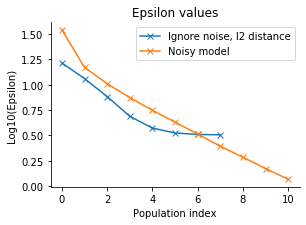

In [33]:
fig, ax = plt.subplots()
pyabc.visualization.plot_epsilons(
    [h_incorrect, h_noisymodel], ["Ignore noise, l2 distance", "Noisy model"], scale="log10", ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches((4,3))

for fmt in ['svg', 'eps']:
    plt.savefig(f'eps.{fmt}', format=f'{fmt}')